In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk as nlp
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [14]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")
df_fake.head()
# df_true.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [15]:
df_true["text"] = df_true["text"].replace("(Reuters)","",regex=True)
df_true.head()
## The String "()" still remains in the text column to be removed which i take care of during the NLP part done below

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON () - The head of a conservative Rep...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON () - Transgender people will be all...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON () - The special counsel investigat...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON () - Trump campaign adviser George ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON () - President Donald Trump...,politicsNews,"December 29, 2017"


In [16]:
df_fake["target"] = 0
df_true["target"] = 1

In [17]:
df_true.head(10)

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON () - The head of a conservative Rep...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON () - Transgender people will be all...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON () - The special counsel investigat...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON () - Trump campaign adviser George ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON () - President Donald Trump...,politicsNews,"December 29, 2017",1
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON () - The Whit...",politicsNews,"December 29, 2017",1
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla () - President Donald Tru...",politicsNews,"December 29, 2017",1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
9,Alabama official to certify Senator-elect Jone...,WASHINGTON () - Alabama Secretary of State Joh...,politicsNews,"December 28, 2017",1


In [18]:
df_fake.head(10)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [19]:
df_fake = df_fake.drop(["title","subject","date"],axis = 1)
df_true = df_true.drop(["title","subject","date"],axis = 1)

In [20]:
df = pd.concat([df_fake,df_true],axis = 0)

In [21]:
df.head(10)

,text,target
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [22]:
df = df.sample(frac=1)
df.head(10)

,text,target
6331,WASHINGTON () - Urged on by U.S. President-ele...,1
19685,,0
17466,"#JokeNewsAfter record, cold temperatures were ...",0
1795,WASHINGTON () - U.S. Supreme Court Justice Ant...,1
17930,Commies carrying flags fought with the Austin ...,0
12411,GENEVA () - Life has stopped in its tracks in ...,1
18566,Child marriage is a problem within Islam. Isla...,0
341,WASHINGTON () - U.S. Republicans in Congress a...,1
19983,So much for the most transparent administrati...,0
14414,SANTIAGO () - Conservative Sebastian Pinera to...,1


In [23]:
df.reset_index(inplace=True)
df.drop(["index"], axis = 1, inplace = True)
df.head(10)

,text,target
0,WASHINGTON () - Urged on by U.S. President-ele...,1
1,,0
2,"#JokeNewsAfter record, cold temperatures were ...",0
3,WASHINGTON () - U.S. Supreme Court Justice Ant...,1
4,Commies carrying flags fought with the Austin ...,0
5,GENEVA () - Life has stopped in its tracks in ...,1
6,Child marriage is a problem within Islam. Isla...,0
7,WASHINGTON () - U.S. Republicans in Congress a...,1
8,So much for the most transparent administrati...,0
9,SANTIAGO () - Conservative Sebastian Pinera to...,1


In [24]:
import re
import string

def wordopt(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)  # Remove [text]
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words with numbers
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

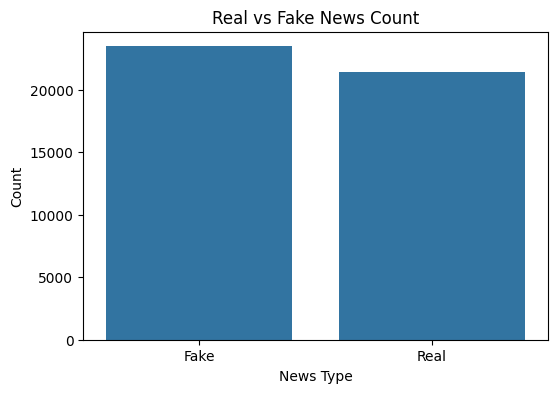

                                                    text  target  text_length
0      washington urged on by us presidentelect donal...       1         3279
1                                                              0            0
2      jokenewsafter record cold temperatures were re...       0         4603
3      washington us supreme court justice anthony ke...       1         3593
4      commies carrying flags fought with the austin ...       0         1410
...                                                  ...     ...          ...
44893  cnn s president jeff zucker has dictated quest...       0         1910
44894  many new minimum wage increases took effect on...       0         4499
44895  paris president emmanuel macron told us presid...       1          629
44896  baghdad the iraqi parliament on wednesday aske...       1          855
44897  washington us defense secretary jim mattis on ...       1          403

[44898 rows x 3 columns]


In [35]:
df["text"] = df["text"].apply(wordopt)
df.head(100)
df.dropna(inplace=True)
#class distribution of fake vs real news
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Real vs Fake News Count')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()

# print(df)

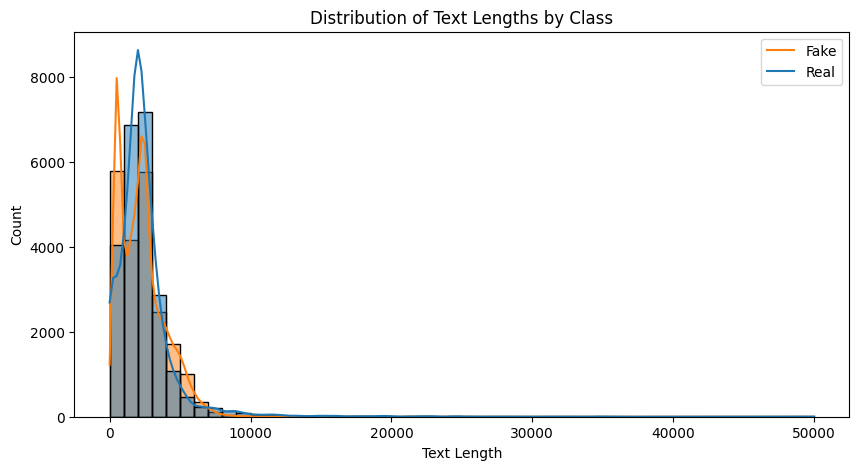

In [26]:
#distribution of text lengths by class (real vs fake)
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='text_length', hue='target', bins=50, kde=True)
plt.title('Distribution of Text Lengths by Class')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.legend(['Fake', 'Real'])
plt.show()

In [ ]:
from wordcloud import WordCloud

# Combine all words by class
real_words = ' '.join(df[df['target'] == 1]['text'])
fake_words = ' '.join(df[df['target'] == 0]['text'])

# WordClouds
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_words)
wordcloud_fake = WordCloud(width=800, height=400, background_color='black', colormap='Set2').generate(fake_words)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Real News WordCloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Fake News WordCloud')
plt.axis('off')

plt.tight_layout()
plt.show()


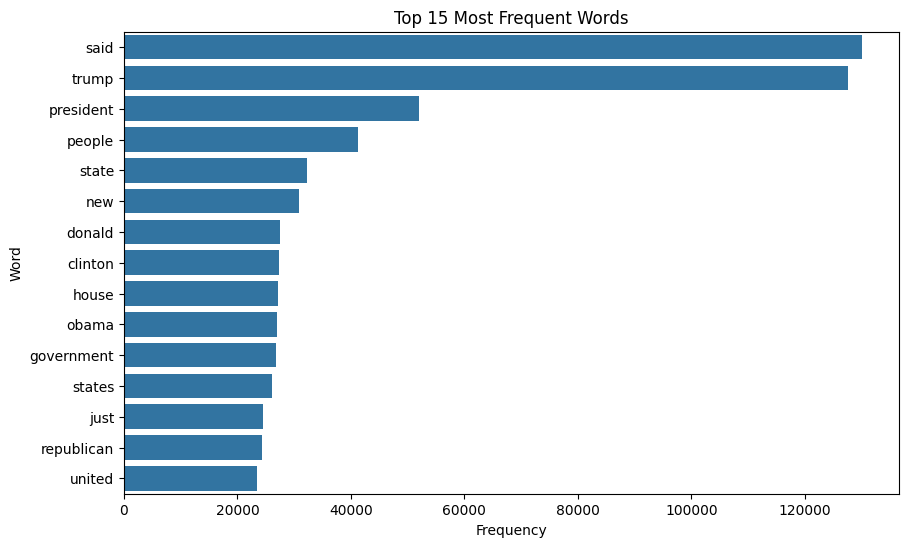

In [27]:
#Top N words by frequency
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

top_words = get_top_n_words(df['text'], 15)
top_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=top_df)
plt.title('Top 15 Most Frequent Words')
plt.show()


In [30]:
X = df["text"]
Y = df["target"]
X.shape

(44898,)

In [31]:
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.25)
X_train.shape

(33673,)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
#print(X_train)
vectorization = TfidfVectorizer()
analyze = vectorization.build_analyzer()
#print(analyze(X_train[0]))
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(x_test)
print(xv_train.shape)
print(xv_test.shape)


(33673, 174232)
(11225, 174232)
  (0, 257)	0.29803698285499775
  (0, 2987)	0.05532744931649006
  (0, 3397)	0.0978104525066808
  (0, 3518)	0.09484512356354587
  (0, 6718)	0.10734782809995762
  (0, 9820)	0.033586503864321056
  (0, 9997)	0.10229696370491696
  (0, 26252)	0.09562299840887843
  (0, 27176)	0.10891711432697836
  (0, 45360)	0.11626123372663562
  (0, 45567)	0.08733198224431744
  (0, 55931)	0.059020906987878735
  (0, 56439)	0.13566840196678728
  (0, 72632)	0.053721880608915626
  (0, 77237)	0.052120547931928295
  (0, 77656)	0.17190979872866294
  (0, 77955)	0.27298346018439
  (0, 82702)	0.20615806618857443
  (0, 82716)	0.11946656436895325
  (0, 83403)	0.42370668622932006
  (0, 95556)	0.07680954526771828
  (0, 96055)	0.1117876771428588
  (0, 97415)	0.3221627497168503
  (0, 101504)	0.05130733118822784
  (0, 101570)	0.05940744853630198
  :	:
  (11224, 157814)	0.14051977488225334
  (11224, 159307)	0.04917912500626469
  (11224, 159477)	0.03346579497467275
  (11224, 159951)	0.06010275602

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(xv_train,Y_train)
print("The Accuracy of the Logistic Regression Model is {}".format(lr.score(xv_test,y_test)))

The Accuracy of the Logistic Regression Model is 0.9808463251670378


In [27]:
print(classification_report(y_test,lr.predict(xv_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5965
           1       0.98      0.98      0.98      5260

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xv_train,Y_train)
print("The Accuracy of the Decision Tree Classifier Model is {}".format(dtc.score(xv_test,y_test)))
print(classification_report(y_test,dtc.predict(xv_test)))

The Accuracy of the Decision Tree Classifier Model is 0.9526057906458797
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      5965
           1       0.96      0.94      0.95      5260

    accuracy                           0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225



In [29]:
from sklearn.ensemble import GradientBoostingClassifier
gclf = GradientBoostingClassifier()
gclf.fit(xv_train,Y_train)
print("The Accuracy of the Decision Tree Classifier Model is {}".format(gclf.score(xv_test,y_test)))
print(classification_report(y_test,gclf.predict(xv_test)))

The Accuracy of the Decision Tree Classifier Model is 0.9721158129175946
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      5965
           1       0.96      0.98      0.97      5260

    accuracy                           0.97     11225
   macro avg       0.97      0.97      0.97     11225
weighted avg       0.97      0.97      0.97     11225



In [30]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier()
rclf.fit(xv_train,Y_train)
print("The Accuracy of the Random Forest Classifier Model is {}".format(rclf.score(xv_test,y_test)))
print(classification_report(y_test,rclf.predict(xv_test)))

The Accuracy of the Random Forest Classifier Model is 0.9805790645879733
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5965
           1       0.98      0.98      0.98      5260

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



In [32]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = lr.predict(new_xv_test)
    pred_DT = dtc.predict(new_xv_test)
    pred_GBC = gclf.predict(new_xv_test)
    pred_RFC = rclf.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [ ]:
news = str(input())
manual_testing(news)

In [ ]:
news = str(input())
manual_testing(news)

In [ ]:
news = str(input())
manual_testing(news)

In [46]:
data = pd.read_csv('News.csv',index_col=0)
data = data.drop(["title", "subject","date"], axis = 1)
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)
data["text"] = data["text"].replace("(Reuters)","",regex=True)
data["text"] = data["text"].apply(wordopt)
data.dropna(inplace=True)

data.head(100)

# data.head()
# print(x_test)
# print(y_test)

,text,class
0,there is something really off about trump and ...,0
1,moscow russian lawmakers are to discuss a prop...,1
2,this video should be viewed by every middle sc...,0
3,donald trump and paul ryan thought they d get ...,0
4,century wire says this latest diplomatic devel...,0
...,...,...
95,washington the cofounder of the firm that comm...,1
96,sochi russia iranian president hassan rouhani ...,1
97,washington us president donald trump decided t...,1
98,it turns out the words affordable and care wer...,0


In [44]:
sample_test = data.sample(200)
sample_test.reset_index(inplace=True)


In [45]:
sample_test.head()

,index,text,class
0,37377,washington us interior secretary ryan zinke sa...,1
1,7,here are some of the highlights of the intervi...,1
2,41830,the funny thing is we all know the media s obs...,0
3,38471,if there s one news organization that donald t...,0
4,27638,new york two former associates of new jersey g...,1


In [47]:
sample_x = data["text"]
sample_y = data["class"]

sample_xv = vectorization.transform(sample_x)

print("The Accuracy of the Logistic Regression Model is {}".format(lr.score(sample_xv,sample_y)))

KeyError: 'target'